## CMPINF 2100 Week 06

### Categorical to continuous variable relationships

### OR...CONDITIONAL DISTRIBUTIONS!!!!

We have previously examined the counts of categorical variables by themselves. The distributions of continuous variables by themselves. Let's now consider how a continuous variable's distribution CHANGES across the categories of a categorical variable. Meaning, the distribution is CONDITIONED ON or **GROUPED BY** a categorical variable!!!

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Read data

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
gap_url = 'https://raw.githubusercontent.com/chendaniely/pandas_for_everyone/master/data/gapminder.tsv'

In [4]:
gap_df = pd.read_csv( gap_url, sep = '\t' )

In [5]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
gap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


## Penguins

We previously looked at the MARGINAL distribution of `flipper_length_mm`.

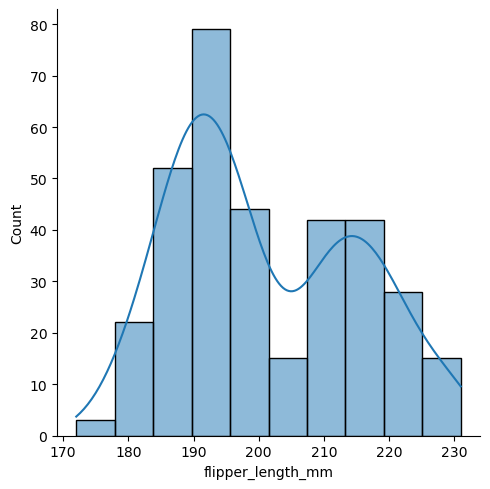

In [7]:
sns.displot( data = penguins, x='flipper_length_mm', kind='hist', kde=True )

plt.show()

But...let's now CONDITION or GROUP BY the categorical variable `species`! We will therefore examine if the distribution of `flipper_length_mm` CHANGES or is DIFFERENT across the categories of `species`!

One way to create this figure is as a histogram that is colored by `species`.

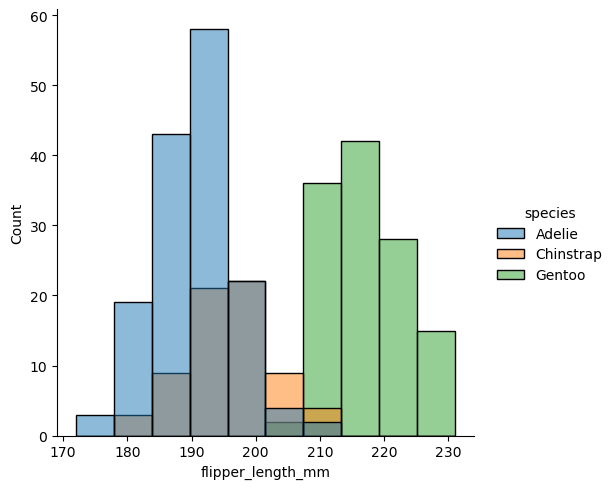

In [8]:
sns.displot(data = penguins, x='flipper_length_mm', hue='species', kind='hist')

plt.show()

You should use FACETS to represent the categories of a second categorical variable when showing the distribution as a histogram.

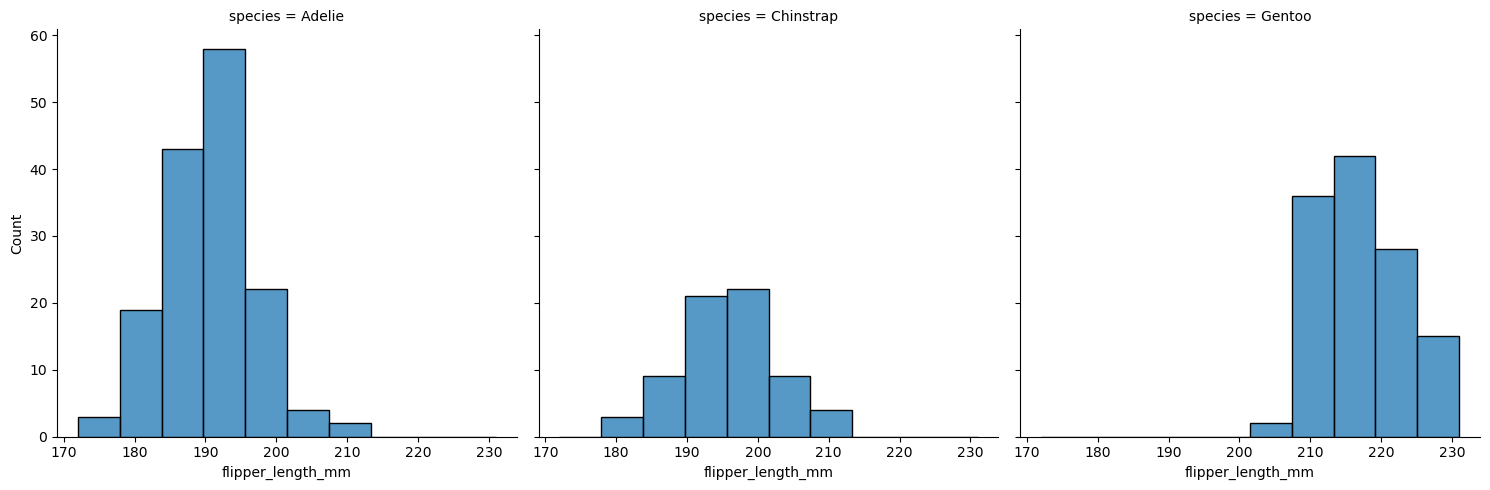

In [9]:
sns.displot(data = penguins, x='flipper_length_mm', col='species', kind='hist')

plt.show()

In [10]:
penguins.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

We cannot use the bar height of the histogram alone! We need to change how we represent concentration.

It is better to use the DENSITY to visualize concentration rather than count.

We will instead in this class use the KDE plot or really the GROUPED or CONDITIONAL KDE plot to study how the distribution varies across categories!!!!

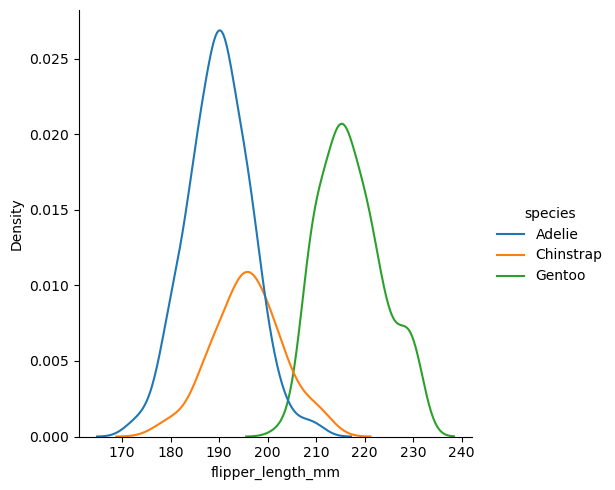

In [11]:
sns.displot( data = penguins, x='flipper_length_mm', hue='species', kind='kde' )

plt.show()

UNFORTUNATELY...Seaborn does not handle the SAMPLE SIZE CORRECTLY with GROUPED or CONDITIONAL KDE PLOTS!!!!!

Seaborn is getting fooled by sample size!!!

We need to remove the sample size effect!!!

To do that, we must include the `common_norm=False` argument!!!

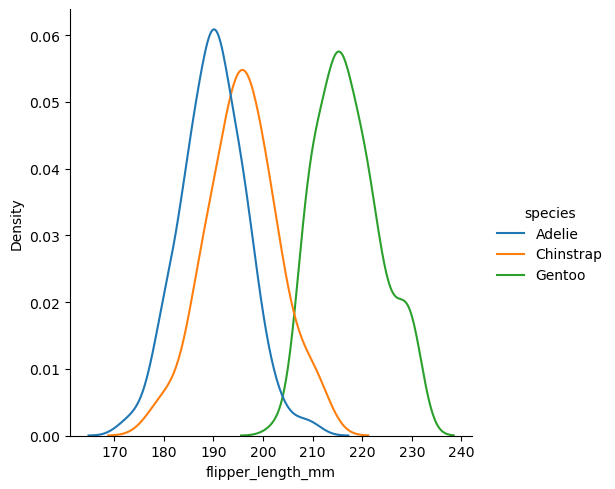

In [12]:
sns.displot(data = penguins, x='flipper_length_mm', hue='species',
            common_norm=False, kind='kde')

plt.show()

Sometimes we just want to know useful SUMMARY statistics.

For example, is the MEDIAN changing across the categories?

What is the median? 50% of the observations are LESS in value than the MEDIAN. 50% of the observations are greater in value that the MEDIAN.

In [13]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [14]:
penguins.flipper_length_mm.median()

197.0

In [16]:
penguins.loc[ penguins.flipper_length_mm < penguins.flipper_length_mm.median(), :].shape[0]

166

In [18]:
penguins.loc[ penguins.flipper_length_mm <= penguins.flipper_length_mm.median(), :].shape[0] / penguins.shape[0]

0.5116279069767442

We can easily visualize how the MEDIAN changes across categories via a BOXPLOT!!!!!!

### Boxplot

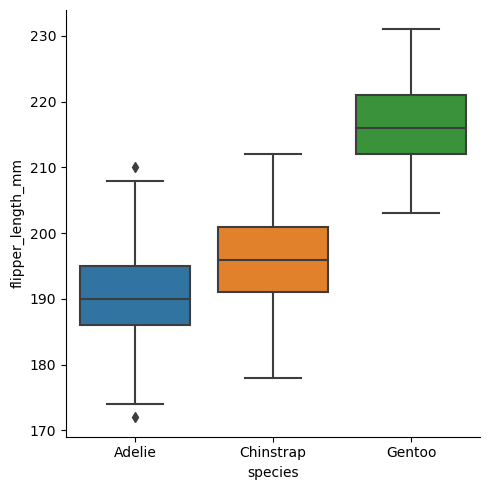

In [19]:
sns.catplot( data = penguins, x='species', y='flipper_length_mm', kind='box' )

plt.show()

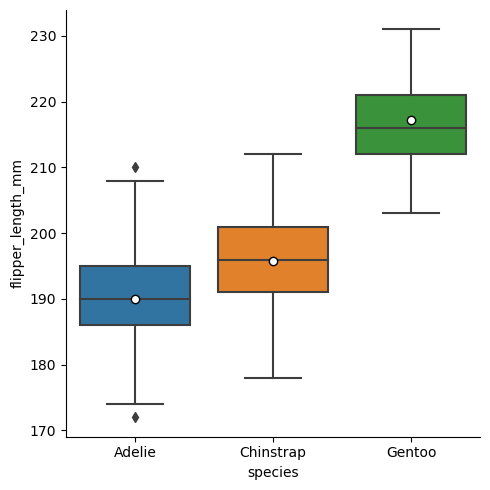

In [23]:
sns.catplot(data = penguins, x='species', y='flipper_length_mm', kind='box',
            showmeans=True,
            meanprops={'marker': 'o', 'markerfacecolor': 'white', 'markeredgecolor': 'black'})

plt.show()

Seaborn allows us to visually identify if we can TRUST if the average is different across groups!!!!

Seaborn can include the CONFIDENCE INTERVAL or the STANDARD ERROR INTERVAL around the average!!!!

The confidence interval can be included via the POINT PLOT!!!

### Point Plot

Point Plot is focused on camparing averages across groups!!!

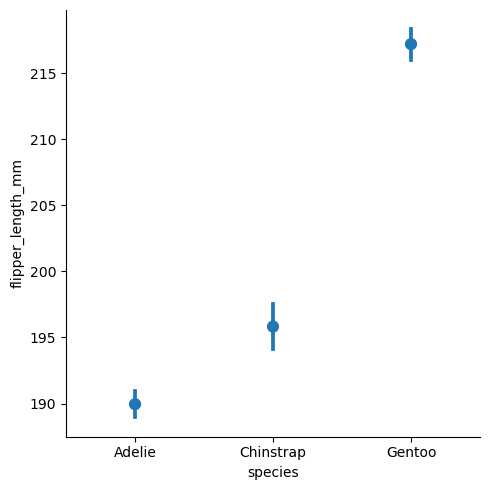

In [25]:
sns.catplot( data = penguins, x='species', y='flipper_length_mm', kind='point', join=False )

plt.show()

## Gap minder

The `year` variable has just 12 unique values. Let's continue to treat it as a categorical for our visual exploration.

Let's examine if the year is associated with changes in the `lifeExp` variable.

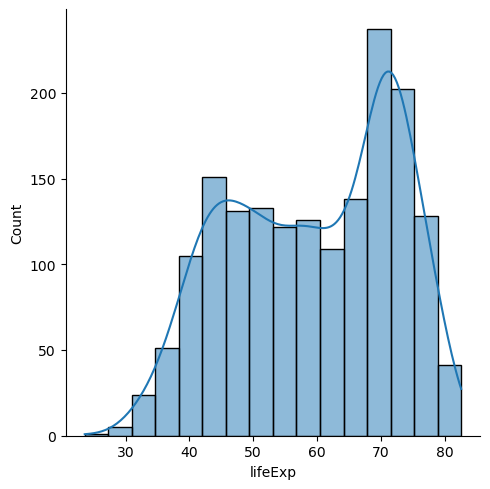

In [26]:
sns.displot(data = gap_df, x='lifeExp', kind='hist', kde=True) 

plt.show()

The conditional KDE given or GROUPED BY `year`.

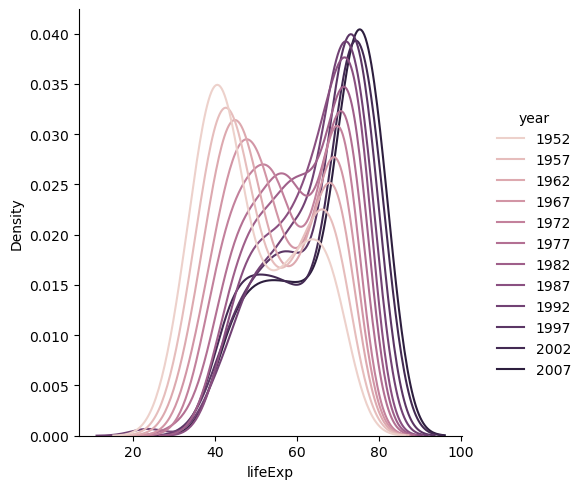

In [27]:
sns.displot(data = gap_df, x='lifeExp', hue='year', kind='kde', 
            common_norm=False)

plt.show()

Let's streamline things and focus on the summary statistics for now, rather than on the distributional shape.

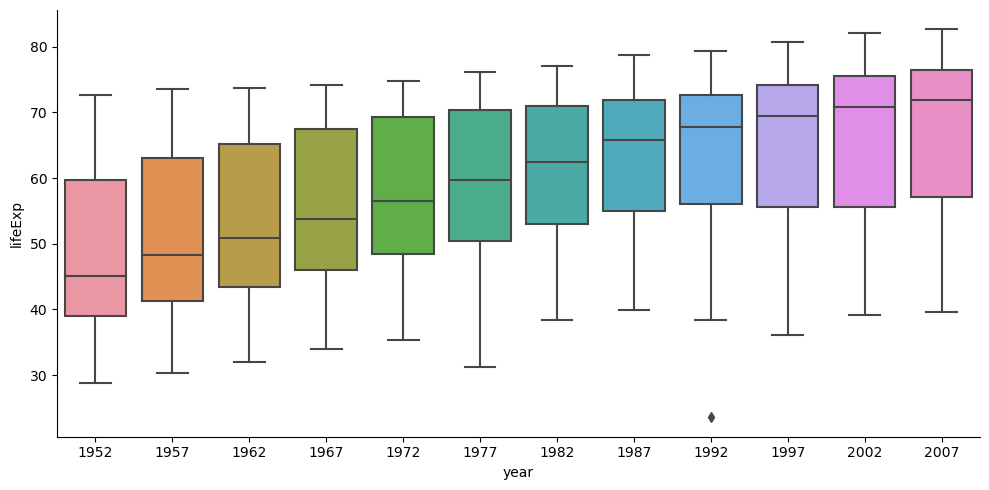

In [29]:
sns.catplot(data = gap_df, x='year', y='lifeExp', kind='box', aspect=2)

plt.show()

Is the average `lifeExp` changing...I need to examine the POINT PLOT!!!

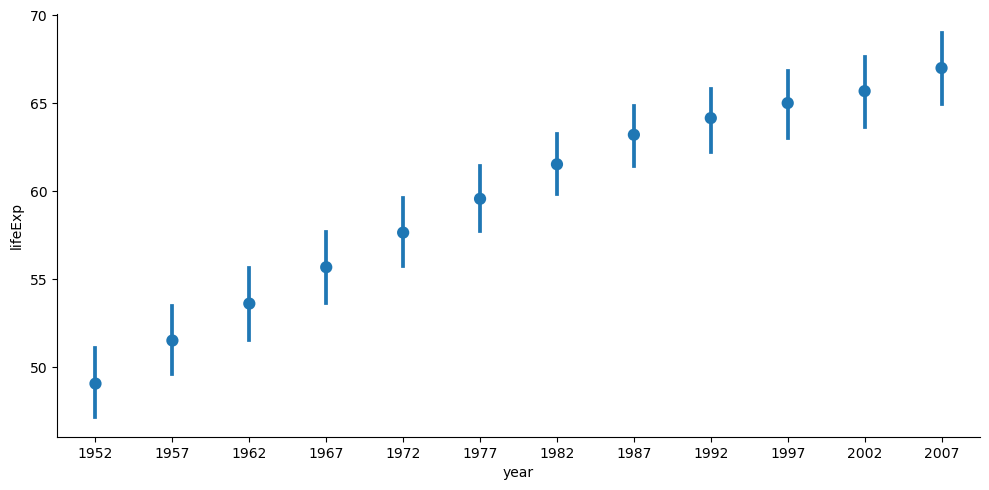

In [32]:
sns.catplot(data = gap_df, x='year', y='lifeExp', kind='point', aspect=2, join=False)

plt.show()

We can COLOR by a 3rd variable or a SECONDARY categorical variable in a boxplot...

Let's examine the distribution of the `lifeExp` per `year` per `continent`.

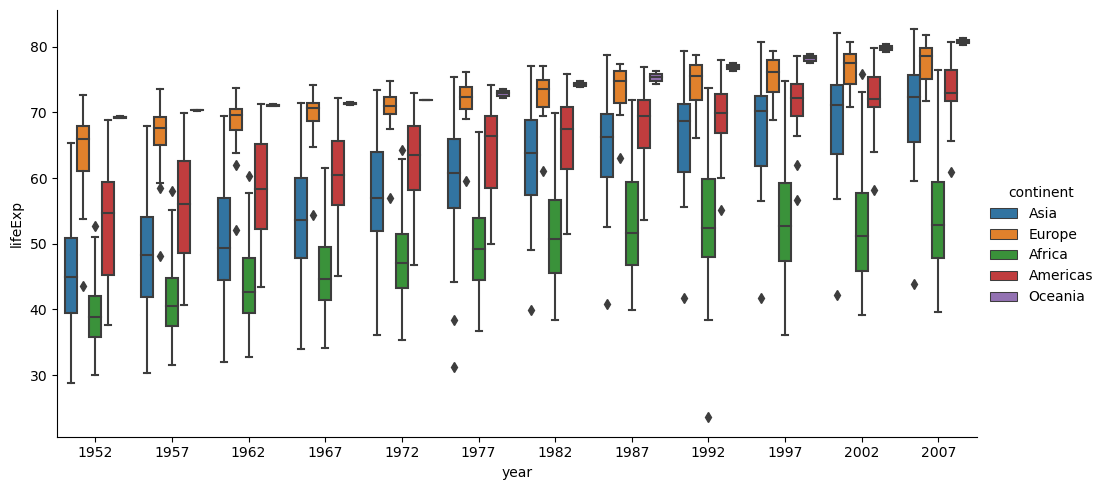

In [34]:
sns.catplot(data = gap_df, x='year', y='lifeExp', hue='continent', kind='box', aspect=2)

plt.show()